<a href="https://colab.research.google.com/github/HeinKo2000252/My_Thesis/blob/main/Final%2BREAL_Evaluation_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# ============================================================
# MASTER'S THESIS COMPLETE PIPELINE
# "Extraction of Emotional Assessments of Situations
#  from Natural Language Texts"
#
# SECTIONS:
# 0. Setup & Config
# 1. Model Loading (RuBERT from Google Drive)
# 2. Emotion Detection
# 3. Plutchik Intensity Scale
# 4. Situation Generation (LLM)
# 5. Knowledge Graph (KG) with RDF/OWL
# 6. RAG - Retrieval Augmented Generation
# 7. Aspect-Oriented Analysis
# 8. Values & Cluster Analysis
# 9. Evaluation Metrics
# 10. Visualization
# 11. Full Pipeline Runner
# ============================================================


# ============================================================
# SECTION 0: SETUP & INSTALL
# ============================================================
# Run this cell first in Google Colab
!pip install transformers torch scikit-learn matplotlib openai -q
!pip install rdflib -q
!pip install sentence-transformers -q
!pip install chromadb -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.0/52.0 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 69.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.0/220.0 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.6/71.6 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
🔄 Loading RuBERT emotion model from Google Drive...


Loading weights:   0%|          | 0/201 [00:01<?, ?it/s]

✅ Model ready

  ✅  Я так счастлив!
       → ['joy']  |  scores: {'joy': 0.978, 'sadness': 0.038, 'surprise': 0.145, 'fear': 0.044, 'anger': 0.105}
  ✅  Ты меня бесишь!
       → ['anger']  |  scores: {'joy': 0.052, 'sadness': 0.054, 'surprise': 0.074, 'fear': 0.056, 'anger': 0.987}
  ✅  О боже! Не ожидал!
       → ['surprise']  |  scores: {'joy': 0.041, 'sadness': 0.05, 'surprise': 0.983, 'fear': 0.068, 'anger': 0.046}
  ✅  Мне страшно.
       → ['fear']  |  scores: {'joy': 0.134, 'sadness': 0.226, 'surprise': 0.073, 'fear': 0.986, 'anger': 0.118}
  ✅  Мне очень грустно.
       → ['sadness']  |  scores: {'joy': 0.088, 'sadness': 0.977, 'surprise': 0.065, 'fear': 0.078, 'anger': 0.064}

  🎯 Basic Test: 5/5

  🔄 Loading embedding model for RAG...


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/645 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/471M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertModel LOAD REPORT from: sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2
Key                     | Status     |  | 
------------------------+------------+--+-
embeddings.position_ids | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


tokenizer_config.json:   0%|          | 0.00/526 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

  ✅ RAG module ready

📰 NEWS: Путин и Трамп встретились для переговоров о мире на Украине.

📍 A. Situation Generation (RAG)
-----------------------------------------------------------------
  RAG context used: ➖ No (first run)

  [1] После многочасовых закрытых переговоров Путин и Трамп выходят с с
       Reaction  : Я смотрю прямую трансляцию и не верю своим ушам. Сердце колотится
       Emotion   : joy (96%)
       Plutchik  : Ecstasy
       Action    : High — Likely action
       Value     : Stability & Progress
       Aspect    : တည်ငြိမ်မှု / ဥပဒေစိုးမိုးမှု (stability_order, conf=0.9)
       Reason    : Надежда на прекращение войны и восстановление мира, что напр

  [2] Встреча завершается без подписания документов, но Трамп заявляет,
       Reaction  : Я читаю сводки новостей и чувствую горькое разочарование. Опять т
       Emotion   : fear (98%)
       Plutchik  : Fear
       Action    : Med  — Possible reaction
       Value     : Security & Safety
       Aspect    : တည်ငြိမ်မှ

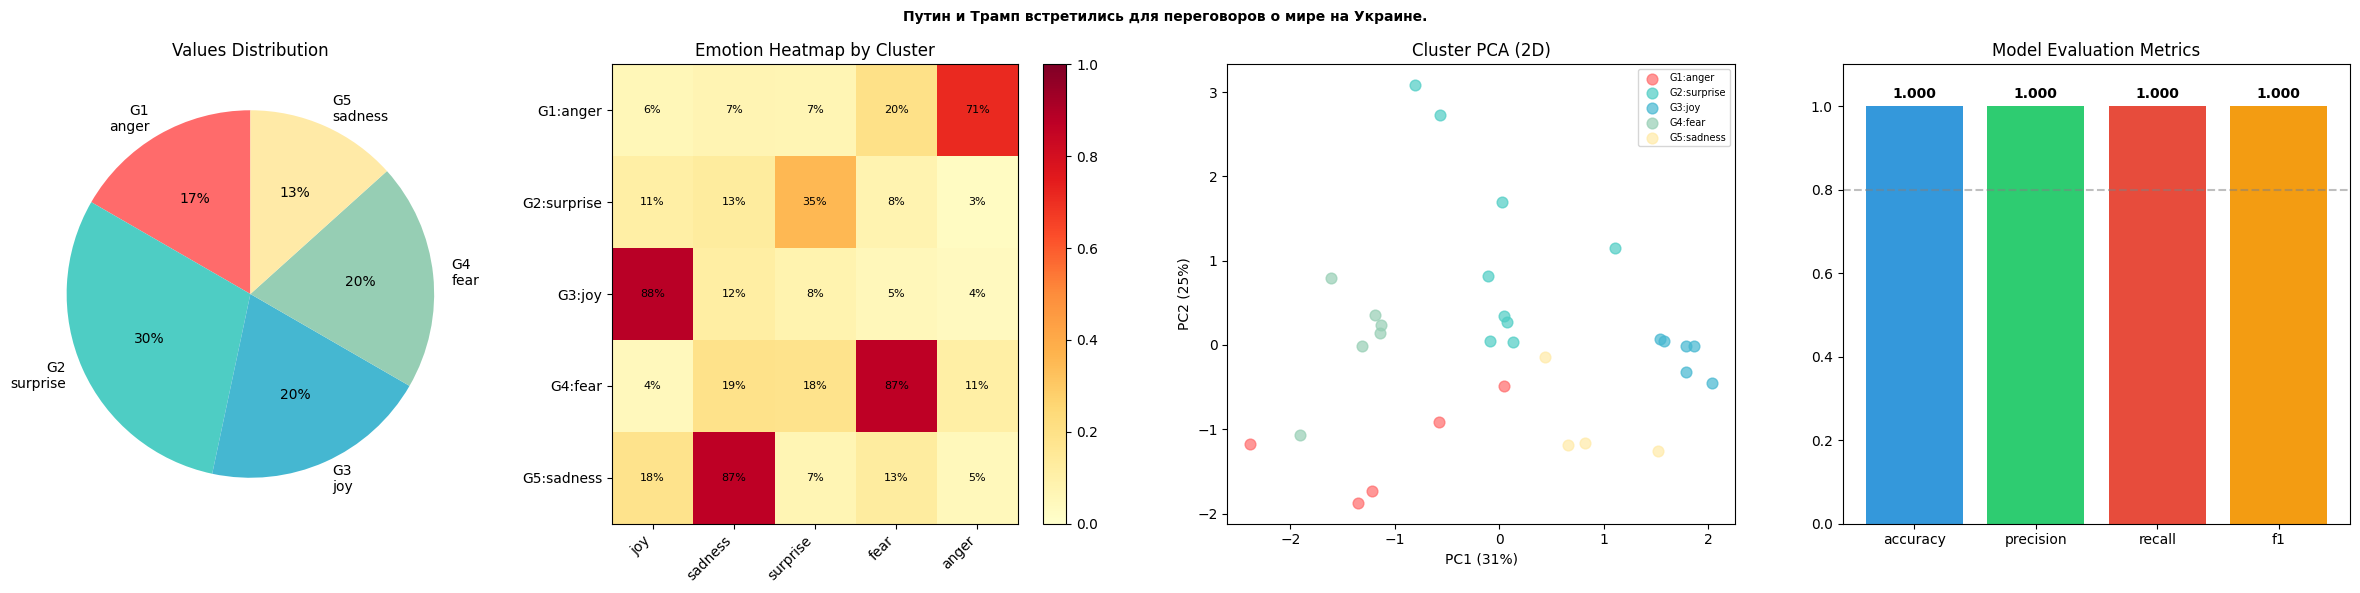

  📊 Chart saved → /content/thesis_Путин_и_Трамп_встретились.png

📊 SUMMARY
  News           : Путин и Трамп встретились для переговоров о мире на Укр
  Situations     : 3
  Intensity      : High — Likely action
  Value Groups   : 5
  KG Triples     : 70
  RAG Index Size : 3
  Dominant Values:
    → Predictability & Order (9 people)
    → Stability & Progress (6 people)
    → Security & Safety (6 people)

📰 NEWS: Ракетный удар уничтожил жилые кварталы мирного города.

📍 A. Situation Generation (RAG)
-----------------------------------------------------------------
  RAG context used: ✅ Yes

  [1] Международное сообщество, включая ООН и ключевые мировые державы,
       Reaction  : Я чувствую горькое удовлетворение, что наконец-то мир увидел эту 
       Emotion   : sadness (82%)
       Plutchik  : Grief
       Action    : High — Likely action
       Value     : Human Life & Peace
       Aspect    : လူ့အသက် / ကာကွယ်ရေး (human_safety, conf=0.9)
       Reason    : Гибель и страдания мирных ж

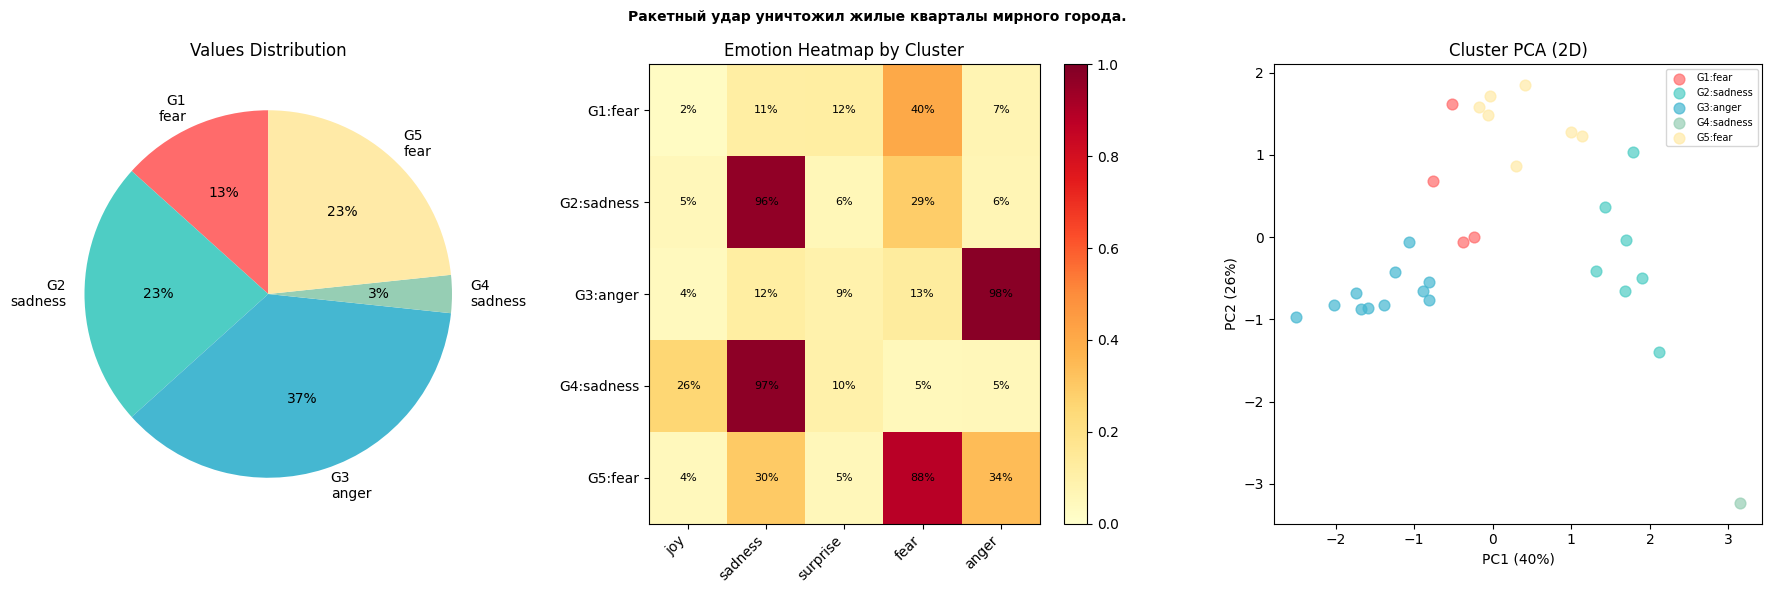

  📊 Chart saved → /content/thesis_Ракетный_удар_уничтожил_ж.png

📊 SUMMARY
  News           : Ракетный удар уничтожил жилые кварталы мирного города.
  Situations     : 3
  Intensity      : High — Likely action
  Value Groups   : 5
  KG Triples     : 95
  RAG Index Size : 6
  Dominant Values:
    → Justice & Rights (11 people)
    → Human Life & Peace (7 people)
    → Security & Safety (7 people)

📰 NEWS: Страны ввели новые санкции против России.

📍 A. Situation Generation (RAG)
-----------------------------------------------------------------
  RAG context used: ✅ Yes

  [1] Новые санкции оказываются точечными и направленными на ограниченн
       Reaction  : Я чувствую облегчение. Это просто показуха для прессы, ничего по-
       Emotion   : sadness (96%)
       Plutchik  : Grief
       Action    : High — Likely action
       Value     : Human Life & Peace
       Aspect    : တည်ငြိမ်မှု / ဥပဒေစိုးမိုးမှု (stability_order, conf=0.8)
       Reason    : Ожидание, что санкции не приведут к

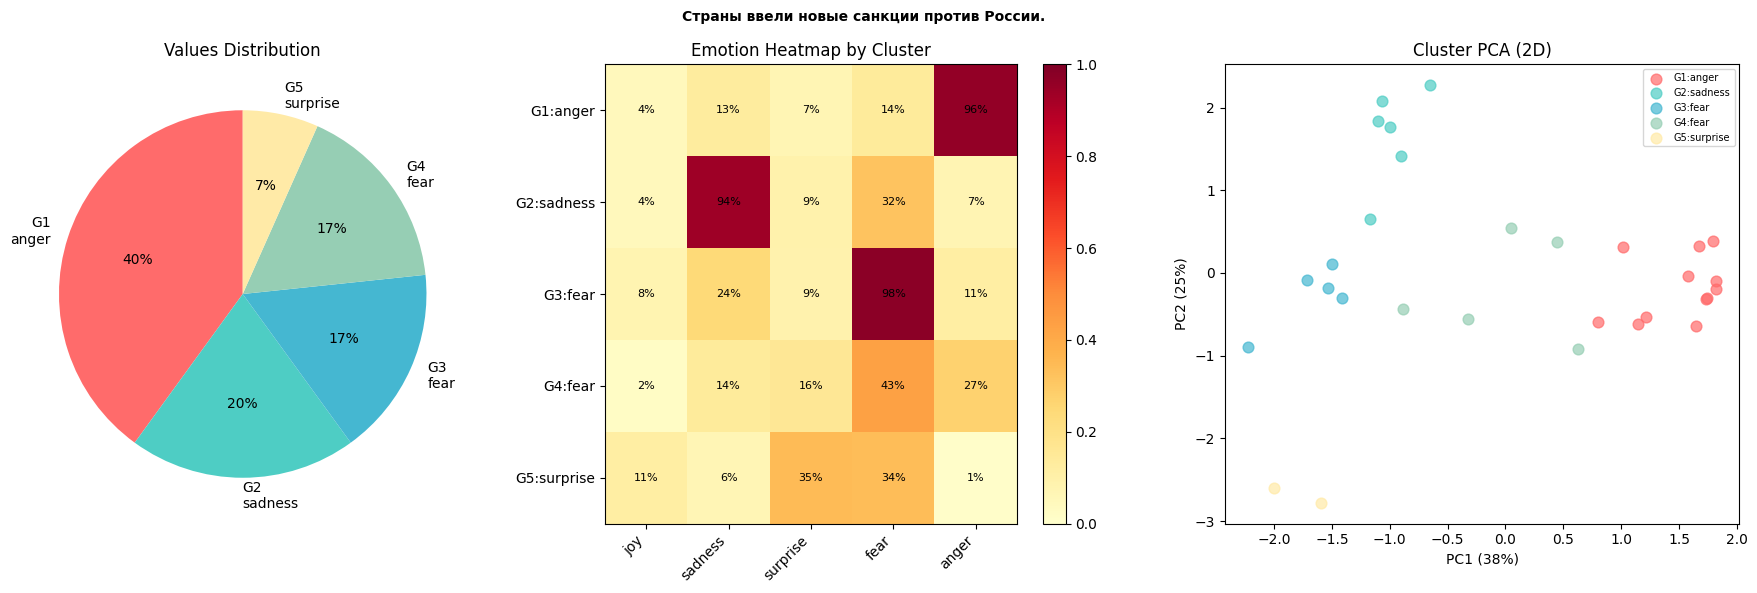

  📊 Chart saved → /content/thesis_Страны_ввели_новые_санкци.png

📊 SUMMARY
  News           : Страны ввели новые санкции против России.
  Situations     : 3
  Intensity      : High — Likely action
  Value Groups   : 5
  KG Triples     : 117
  RAG Index Size : 9
  Dominant Values:
    → Justice & Rights (12 people)
    → Human Life & Peace (6 people)
    → Security & Safety (5 people)

💾 Saving Knowledge Graph...
  💾 KG saved → /content/thesis_kg.owl  (117 triples)
  💾 KG saved → /content/thesis_kg.ttl  (117 triples)
  📊 KG Stats: 117 triples | 117 subjects
  📊 RAG Index: 9 situations indexed

🎉 PIPELINE COMPLETE!


In [4]:
from google.colab import drive
drive.mount('/content/drive')

import torch
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import json
import os
import re
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, classification_report, confusion_matrix
)
from sklearn.decomposition import PCA
from collections import Counter, defaultdict
from openai import OpenAI

# rdflib for Knowledge Graph / RDF / OWL
from rdflib import Graph, Literal, Namespace, URIRef
from rdflib.namespace import RDF, RDFS, OWL, XSD

# sentence-transformers for RAG embeddings
from sentence_transformers import SentenceTransformer
import chromadb


# ============================================================
# SECTION 1: CONFIG
# ============================================================

SAVE_PATH    = "/content/drive/MyDrive/rubert_emotion_final"
LABELS       = ['joy', 'sadness', 'surprise', 'fear', 'anger']
THR          = 0.35
DEEPSEEK_KEY = "_"   # <-- ဒါကို မင်းရဲ့ key နဲ့ လဲပါ

EMOTION_TO_VALUES = {
    'joy':      'Stability & Progress',
    'sadness':  'Human Life & Peace',
    'surprise': 'Predictability & Order',
    'fear':     'Security & Safety',
    'anger':    'Justice & Rights',
}

PLUTCHIK_SCALE = {
    'anger':    {'low': 'Annoyance',   'medium': 'Anger',    'high': 'Rage'},
    'fear':     {'low': 'Apprehension','medium': 'Fear',     'high': 'Terror'},
    'sadness':  {'low': 'Pensiveness', 'medium': 'Sadness',  'high': 'Grief'},
    'joy':      {'low': 'Serenity',    'medium': 'Joy',      'high': 'Ecstasy'},
    'surprise': {'low': 'Distraction', 'medium': 'Surprise', 'high': 'Amazement'},
}

ACTION_READINESS = {
    'low':    'Low  — Negotiable',
    'medium': 'Med  — Possible reaction',
    'high':   'High — Likely action',
}

LOW_MARKERS  = ["немного","слегка","чуть","едва","слабо","чуточку"]
MED_MARKERS  = ["очень","сильно","довольно","весьма","боюсь",
                "страшно","тревожно","беспокоит","волнует"]
HIGH_MARKERS = ["ярость","в ужасе","невыносимо","отчаяние",
                "бешенство","в шоке","в ярости","ненавижу"]

PERSONA_GROUPS = [
    ("Пацифист",    "ငြိမ်းချမ်းရေးကို တန်ဖိုးထားသူ"),
    ("Националист", "မိမိနိုင်ငံ အချုပ်အခြာကို ဦးစားပေးသူ"),
    ("Прагматик",   "စီးပွားရေး တည်ငြိမ်မှုကို ဦးစားပေးသူ"),
    ("Либерал",     "လူ့အခွင့်အရေးကို တန်ဖိုးထားသူ"),
    ("Реалист",     "လုံခြုံရေးကို ဦးစားပေးစဉ်းစားသူ"),
]


# ============================================================
# SECTION 2: MODEL LOADING (RuBERT from Google Drive)
# ============================================================

print("🔄 Loading RuBERT emotion model from Google Drive...")
tokenizer = AutoTokenizer.from_pretrained(SAVE_PATH)
model     = AutoModelForSequenceClassification.from_pretrained(SAVE_PATH)
model.eval()

client = OpenAI(api_key=DEEPSEEK_KEY, base_url="https://api.deepseek.com")
print("✅ Model ready\n")


# ============================================================
# SECTION 3: EMOTION DETECTION
# ============================================================

def get_emotion_scores(text):
    """
    RuBERT ကို သုံးပြီး text တစ်ကြောင်းအတွက်
    Emotion Score (0~1) တွေ ထုတ်ပေးသည်
    """
    inputs = tokenizer(
        text, return_tensors="pt",
        truncation=True, max_length=128, padding=True
    )
    with torch.no_grad():
        probs = torch.sigmoid(model(**inputs).logits)[0]
    return {LABELS[i]: round(float(probs[i]), 3) for i in range(len(LABELS))}


def get_active_emotions(scores):
    """Threshold ကျော်တဲ့ Emotion တွေ ပြန်ပေးသည်"""
    active = [l for l, s in scores.items() if s >= THR]
    return active if active else [max(scores, key=scores.get)]


# Quick test ----
test_cases = [
    ("Я так счастлив!", "joy"),
    ("Ты меня бесишь!", "anger"),
    ("О боже! Не ожидал!", "surprise"),
    ("Мне страшно.", "fear"),
    ("Мне очень грустно.", "sadness"),
]
correct = 0
for text, expected in test_cases:
    scores = get_emotion_scores(text)
    active = get_active_emotions(scores)
    ok     = expected in active
    correct += int(ok)
    print(f"  {'✅' if ok else '❌'}  {text}")
    print(f"       → {active}  |  scores: {scores}")
print(f"\n  🎯 Basic Test: {correct}/{len(test_cases)}\n")


# ============================================================
# SECTION 4: PLUTCHIK INTENSITY SCALE
# ============================================================

def get_intensity(text, prob_score):
    """
    Robert Plutchik ရဲ့ Theory အပေါ် အခြေခံပြီး
    Emotion Intensity (low / medium / high) ကို ဆုံးဖြတ်သည်
    Keyword-based + Probability-based method ပေါင်းသုံး
    """
    t = text.lower()
    if any(m in t for m in LOW_MARKERS):  return 'low'
    if any(m in t for m in HIGH_MARKERS): return 'high'
    if any(m in t for m in MED_MARKERS):  return 'medium'
    if prob_score < 0.50: return 'low'
    if prob_score < 0.75: return 'medium'
    return 'high'


def analyze_text(text):
    """
    Text တစ်ခုကို Emotion + Intensity + Value + Action Readiness
    အထိ အပြည့်အဝ ခွဲခြမ်းစိတ်ဖြာပေးသည်
    """
    scores   = get_emotion_scores(text)
    dominant = max(scores, key=scores.get)
    active   = get_active_emotions(scores)
    level    = get_intensity(text, scores[dominant])
    return {
        'text':      text,
        'scores':    scores,
        'dominant':  dominant,
        'active':    active,
        'intensity': level,
        'plut_name': PLUTCHIK_SCALE[dominant][level],
        'action':    ACTION_READINESS[level],
        'value':     EMOTION_TO_VALUES[dominant],
    }


# ============================================================
# SECTION 5: SITUATION GENERATION (LLM - DeepSeek)
# ============================================================

def generate_situations(news, n=3):
    """
    News text တစ်ခုကနေ ဖြစ်လာနိုင်တဲ့
    Future Situations (n ခု) နဲ့ People Reactions တွေကို
    DeepSeek LLM သုံးပြီး Generate လုပ်သည်
    """
    prompt = f"""Отвечай ТОЛЬКО на русском языке.

Новость: {news}

Сгенерируй ровно {n} ситуации и реакции.

СИТУАЦИЯ 1: [описание одним предложением]
РЕАКЦИЯ 1: [от первого лица, начиная с "Я"]

СИТУАЦИЯ 2: [описание одним предложением]
РЕАКЦИЯ 2: [от первого лица, начиная с "Я"]

СИТУАЦИЯ 3: [описание одним предложением]
РЕАКЦИЯ 3: [от первого лица, начиная с "Я"]"""

    raw = client.chat.completions.create(
        model="deepseek-chat",
        messages=[{"role": "user", "content": prompt}],
        temperature=0.7, max_tokens=600
    ).choices[0].message.content

    sits, reacts = [], []
    lines = raw.split('\n')
    for line in lines:
        line = line.strip()
        if not line:
            continue
        low = line.lower()
        if any(low.startswith(p) for p in
               ['ситуация 1','ситуация 2','ситуация 3','**ситуация']):
            if ':' in line:
                text = line.split(':', 1)[1].strip().strip('*').strip()
                if len(text) > 5:
                    sits.append(text)
        elif any(low.startswith(p) for p in
                 ['реакция 1','реакция 2','реакция 3','**реакция','реакция:']):
            if ':' in line:
                text = line.split(':', 1)[1].strip().strip('*').strip()
                if len(text) > 5:
                    reacts.append(text)

    # Fallback: "Я" နဲ့ စတဲ့ sentences ရှာမယ်
    if len(reacts) < n:
        for line in lines:
            line = line.strip()
            if line.startswith('Я ') and len(line) > 15 and line not in reacts:
                reacts.append(line)
            if len(reacts) >= n:
                break

    return sits[:n], reacts[:n]


def generate_diverse_reactions(news, n_per_group=6):
    """
    Persona (ကိုယ်စားလှယ်) ၅ မျိုးထဲကနေ
    မတူညီတဲ့ Emotional Reactions တွေ Generate လုပ်သည်
    Cluster Analysis အတွက် Data ကို ထုတ်ပေးသည်
    """
    all_texts, all_labels = [], []
    for gname, gdesc in PERSONA_GROUPS:
        prompt = f"""Отвечай ТОЛЬКО на русском языке.

Ты — {gname}: человек, который ценит {gdesc}.
Новость: {news}

Напиши {n_per_group} разных эмоциональных реакций от первого лица.
Каждая реакция должна начинаться с "Я" или "Меня".
Реакции должны различаться по интенсивности.

Формат (строго):
РЕАКЦИЯ: [текст]
РЕАКЦИЯ: [текст]
РЕАКЦИЯ: [текст]
РЕАКЦИЯ: [текст]
РЕАКЦИЯ: [текст]
РЕАКЦИЯ: [текст]"""

        raw = client.chat.completions.create(
            model="deepseek-chat",
            messages=[{"role": "user", "content": prompt}],
            temperature=1.0, max_tokens=600
        ).choices[0].message.content

        for line in raw.split('\n'):
            line = line.strip()
            if line.startswith('РЕАКЦИЯ:') and len(line) > 15:
                t = line.split(':', 1)[1].strip()
                if len(t) > 10:
                    all_texts.append(t)
                    all_labels.append(gname)

    return all_texts, all_labels


# ============================================================
# SECTION 6: KNOWLEDGE GRAPH (KG) — RDF / OWL Format
# ============================================================
# Supervisor တောင်းဆိုထားတဲ့ Logico-Semantic Method ကို
# RDF Triples နဲ့ OWL Ontology Format ဖြင့် အကောင်အထည်ဖော်

class KnowledgeGraph:
    """
    Situation တွေ၊ Emotion တွေ၊ Values တွေကို
    RDF Graph ထဲ Node/Edge အဖြစ် သိမ်းဆည်းသည်
    OWL Ontology format နဲ့ Export လုပ်နိုင်သည်
    """

    def __init__(self):
        self.g  = Graph()
        self.EX = Namespace("http://thesis.example.org/")
        self.g.bind("ex",  self.EX)
        self.g.bind("owl", OWL)
        self.g.bind("rdf", RDF)
        self.g.bind("rdfs",RDFS)
        self._define_ontology()

    def _uri(self, text):
        """Text ကို URI-safe ပုံစံ ပြောင်းသည်"""
        safe = re.sub(r'[^\w]', '_', text)[:60]
        return self.EX[safe]

    def _define_ontology(self):
        """OWL Class တွေနဲ့ Property တွေ ကြိုတင်သတ်မှတ်သည်"""
        EX = self.EX
        for cls in ["News", "Situation", "Emotion", "Value",
                    "Intensity", "ActionReadiness"]:
            self.g.add((EX[cls], RDF.type, OWL.Class))

        for prop, domain, range_ in [
            ("leadsTo",        "News",      "Situation"),
            ("hasEmotion",     "Situation", "Emotion"),
            ("hasIntensity",   "Emotion",   "Intensity"),
            ("reflectsValue",  "Emotion",   "Value"),
            ("hasReadiness",   "Emotion",   "ActionReadiness"),
        ]:
            p = EX[prop]
            self.g.add((p, RDF.type,   OWL.ObjectProperty))
            self.g.add((p, RDFS.domain, EX[domain]))
            self.g.add((p, RDFS.range,  EX[range_]))

    def add_analysis(self, news_text, situation_text, emotion_data):
        """
        News → Situation → Emotion → Value ဆက်နွယ်မှုကို
        RDF Triple အဖြစ် KG ထဲ ထည့်သွင်းသည်
        """
        EX = self.EX
        n_uri  = self._uri("news_"      + news_text[:40])
        s_uri  = self._uri("sit_"       + situation_text[:40])
        e_uri  = self._uri("em_"        + emotion_data['dominant']
                                        + "_" + emotion_data['intensity'])
        v_uri  = self._uri("val_"       + emotion_data['value'])
        i_uri  = self._uri("int_"       + emotion_data['intensity'])
        ar_uri = self._uri("ar_"        + emotion_data['intensity'])

        # Nodes
        self.g.add((n_uri,  RDF.type, EX.News))
        self.g.add((n_uri,  EX.text,  Literal(news_text, lang="ru")))
        self.g.add((s_uri,  RDF.type, EX.Situation))
        self.g.add((s_uri,  EX.text,  Literal(situation_text, lang="ru")))
        self.g.add((e_uri,  RDF.type, EX.Emotion))
        self.g.add((e_uri,  EX.emotionType,
                    Literal(emotion_data['dominant'])))
        self.g.add((e_uri,  EX.plutchikName,
                    Literal(emotion_data['plut_name'])))
        self.g.add((e_uri,  EX.score,
                    Literal(emotion_data['scores'][emotion_data['dominant']],
                            datatype=XSD.float)))
        self.g.add((v_uri,  RDF.type, EX.Value))
        self.g.add((v_uri,  EX.valueName, Literal(emotion_data['value'])))
        self.g.add((i_uri,  RDF.type, EX.Intensity))
        self.g.add((i_uri,  EX.level, Literal(emotion_data['intensity'])))
        self.g.add((ar_uri, RDF.type, EX.ActionReadiness))
        self.g.add((ar_uri, EX.readinessLevel,
                    Literal(emotion_data['action'])))

        # Edges (RDF Triples)
        self.g.add((n_uri, EX.leadsTo,       s_uri))
        self.g.add((s_uri, EX.hasEmotion,    e_uri))
        self.g.add((e_uri, EX.hasIntensity,  i_uri))
        self.g.add((e_uri, EX.reflectsValue, v_uri))
        self.g.add((e_uri, EX.hasReadiness,  ar_uri))

    def save_owl(self, path="/content/thesis_kg.owl"):
        """KG ကို OWL (XML/RDF) format နဲ့ Save လုပ်သည်"""
        self.g.serialize(destination=path, format='xml')
        print(f"  💾 KG saved → {path}  ({len(self.g)} triples)")

    def save_turtle(self, path="/content/thesis_kg.ttl"):
        """KG ကို Turtle format နဲ့ Save လုပ်သည် (ဖတ်ရလွယ်)"""
        self.g.serialize(destination=path, format='turtle')
        print(f"  💾 KG saved → {path}  ({len(self.g)} triples)")

    def query_by_value(self, value_name):
        """Value တစ်ခုနဲ့ ဆက်နွယ်တဲ့ Situations တွေကို ရှာသည်"""
        results = []
        for s, p, o in self.g.triples((None, self.EX.valueName,
                                        Literal(value_name))):
            for sit, _, em in self.g.triples((None, self.EX.reflectsValue, s)):
                for news, _, _s in self.g.triples((None, self.EX.leadsTo, None)):
                    results.append(str(news))
        return results

    def stats(self):
        print(f"  📊 KG Stats: {len(self.g)} triples | "
              f"{len(list(self.g.subjects()))} subjects")


# ============================================================
# SECTION 7: RAG — Retrieval Augmented Generation
# ============================================================
# KG ထဲမှာ ရှိတဲ့ Past Situations တွေကို Vector Search နဲ့ ရှာပြီး
# LLM Prompt ထဲ ထည့်ပေးသည် → Better Situation Generation

class RAGModule:
    """
    Retrieval-Augmented Generation (Modular RAG)
    - KG ထဲက Past Situations တွေကို ChromaDB ထဲ Index လုပ်သည်
    - New News ဝင်လာရင် Similar Situations တွေ Retrieve လုပ်သည်
    - Retrieved Context ကို DeepSeek Prompt ထဲ ထည့်ပြီး Generate
    """

    def __init__(self):
        print("  🔄 Loading embedding model for RAG...")
        self.embed_model = SentenceTransformer(
            "sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2"
        )
        self.chroma_client = chromadb.Client()
        self.collection    = self.chroma_client.get_or_create_collection(
            name="thesis_situations"
        )
        self.stored_count  = 0
        print("  ✅ RAG module ready")

    def index_situation(self, news, situation, emotion_data):
        """
        KG ထဲ ထည့်ပြီးတဲ့ Situation တစ်ခုကို
        Vector DB (ChromaDB) ထဲ Index လုပ်သည်
        """
        doc = f"News: {news} | Situation: {situation} | " \
              f"Emotion: {emotion_data['dominant']} | " \
              f"Value: {emotion_data['value']}"

        embedding = self.embed_model.encode(doc).tolist()

        self.collection.add(
            ids        =[f"sit_{self.stored_count}"],
            embeddings =[embedding],
            documents  =[doc],
            metadatas  =[{
                "news":      news[:100],
                "situation": situation[:200],
                "emotion":   emotion_data['dominant'],
                "value":     emotion_data['value'],
                "intensity": emotion_data['intensity'],
            }]
        )
        self.stored_count += 1

    def retrieve(self, query_news, top_k=3):
        """
        New News နဲ့ အလားတူတဲ့ Past Situations တွေကို ရှာသည်
        """
        if self.stored_count == 0:
            return []
        q_embed = self.embed_model.encode(query_news).tolist()
        results = self.collection.query(
            query_embeddings=[q_embed],
            n_results=min(top_k, self.stored_count)
        )
        return results['metadatas'][0] if results['metadatas'] else []

    def augmented_generate(self, news, top_k=3, n_situations=3):
        """
        RAG ကို သုံးပြီး Past Knowledge ကို အခြေခံကာ
        Situations Generation ကို ပိုမိုကောင်းမွန်စေသည်
        """
        retrieved = self.retrieve(news, top_k)

        # Context တည်ဆောက်ခြင်း
        if retrieved:
            context_parts = []
            for r in retrieved:
                context_parts.append(
                    f"- Previous: {r['news'][:60]} → "
                    f"{r['situation'][:80]} → {r['emotion']} / {r['value']}"
                )
            context = "\n".join(context_parts)
            context_block = f"\nПохожие ситуации из прошлого:\n{context}\n"
        else:
            context_block = ""

        prompt = f"""Отвечай ТОЛЬКО на русском языке.
{context_block}
Новость: {news}

На основе контекста выше (если есть), сгенерируй {n_situations} новые ситуации.

СИТУАЦИЯ 1: [описание]
РЕАКЦИЯ 1: [от первого лица с "Я"]
СИТУАЦИЯ 2: [описание]
РЕАКЦИЯ 2: [от первого лица с "Я"]
СИТУАЦИЯ 3: [описание]
РЕАКЦИЯ 3: [от первого лица с "Я"]"""

        raw = client.chat.completions.create(
            model="deepseek-chat",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.7, max_tokens=700
        ).choices[0].message.content

        sits, reacts = [], []
        for line in raw.split('\n'):
            line = line.strip()
            if not line:
                continue
            low = line.lower()
            if any(low.startswith(p) for p in
                   ['ситуация 1','ситуация 2','ситуация 3']):
                if ':' in line:
                    t = line.split(':',1)[1].strip()
                    if len(t) > 5:
                        sits.append(t)
            elif any(low.startswith(p) for p in
                     ['реакция 1','реакция 2','реакция 3','реакция:']):
                if ':' in line:
                    t = line.split(':',1)[1].strip()
                    if len(t) > 5:
                        reacts.append(t)

        # Fallback
        if len(reacts) < n_situations:
            for line in raw.split('\n'):
                line = line.strip()
                if line.startswith('Я ') and len(line) > 15 and line not in reacts:
                    reacts.append(line)
                if len(reacts) >= n_situations:
                    break

        used_rag = len(retrieved) > 0
        return sits[:n_situations], reacts[:n_situations], used_rag

    def stats(self):
        print(f"  📊 RAG Index: {self.stored_count} situations indexed")


# ============================================================
# SECTION 8: ASPECT-ORIENTED ANALYSIS
# ============================================================
# "ဘာကြောင့် ဒီ Emotion ဖြစ်ရတာလဲ" ဆိုတဲ့ Aspect (အကြောင်းရင်း) ကို
# Supervisor က ၂ ကြိမ် ထပ်တလဲလဲ ပြောသွားတဲ့ အချက်ဖြစ်တယ်

ASPECT_CATEGORIES = {
    "human_safety":     "လူ့အသက် / ကာကွယ်ရေး",
    "economy":          "စီးပွားရေး / ငွေကြေး",
    "rights_freedom":   "အခွင့်အရေး / လွတ်လပ်မှု",
    "stability_order":  "တည်ငြိမ်မှု / ဥပဒေစိုးမိုးမှု",
    "information":      "အချက်အလက် / မှန်မမှန်",
}

def extract_aspects(text, emotion, news_context=""):
    """
    Text တစ်ကြောင်းထဲမှာ Emotion ဖြစ်ရတဲ့ Aspect (အကြောင်းရင်း) ကို
    DeepSeek LLM ကို မေးပြီး ထုတ်ယူသည်
    """
    prompt = f"""Отвечай ТОЛЬКО на русском языке. Будь краток.

Текст: "{text}"
Контекст новости: "{news_context[:100]}"
Обнаруженная эмоция: {emotion}

Определи ПРИЧИНУ этой эмоции. Выбери ОДНУ из категорий:
- human_safety: угроза жизни, безопасности людей
- economy: экономические последствия, финансы
- rights_freedom: права человека, свобода
- stability_order: стабильность, порядок
- information: достоверность информации

Ответ строго в формате JSON:
{{"category": "...", "reason": "...", "confidence": 0.0}}"""

    try:
        raw = client.chat.completions.create(
            model="deepseek-chat",
            messages=[{"role": "user", "content": prompt}],
            temperature=0.3, max_tokens=200
        ).choices[0].message.content

        # JSON ထုတ်ယူမည်
        match = re.search(r'\{.*?\}', raw, re.DOTALL)
        if match:
            data = json.loads(match.group())
            return {
                "category":   data.get("category", "unknown"),
                "reason":     data.get("reason", ""),
                "confidence": float(data.get("confidence", 0.5)),
                "label":      ASPECT_CATEGORIES.get(
                                  data.get("category",""), "မသိ")
            }
    except Exception:
        pass

    return {"category": "unknown", "reason": "", "confidence": 0.0, "label": "မသိ"}


# ============================================================
# SECTION 9: VALUES & CLUSTER ANALYSIS
# ============================================================

def cluster_reactions(reactions, group_labels, n_clusters=5):
    """
    Diverse Reactions တွေကို Emotion Vector အဖြစ် ပြောင်းပြီး
    K-Means Clustering နဲ့ တန်ဖိုးအုပ်စု (Value Groups) ခွဲသည်
    """
    if len(reactions) < n_clusters:
        n_clusters = max(2, len(reactions) // 2)

    vectors = np.array([
        list(get_emotion_scores(r).values()) for r in reactions
    ])
    vectors_scaled = StandardScaler().fit_transform(vectors)
    labels_k = KMeans(
        n_clusters=n_clusters, random_state=42, n_init=10
    ).fit_predict(vectors_scaled)

    cluster_results = []
    for c in range(n_clusters):
        mask    = labels_k == c
        c_vecs  = vectors[mask]
        c_reacts = [r for r, m in zip(reactions, mask) if m]
        c_groups = [g for g, m in zip(group_labels, mask) if m]
        if len(c_vecs) == 0:
            continue

        avg_e    = c_vecs.mean(axis=0)
        e_prof   = {LABELS[i]: round(float(avg_e[i]), 3) for i in range(len(LABELS))}
        dom_e    = max(e_prof, key=e_prof.get)
        sorted_e = sorted(e_prof.items(), key=lambda x: -x[1])

        cluster_results.append({
            "id":       c + 1,
            "size":     int(sum(mask)),
            "dominant": dom_e,
            "value":    EMOTION_TO_VALUES[dom_e],
            "profile":  e_prof,
            "sorted_e": sorted_e,
            "origins":  list(set(c_groups)),
            "samples":  c_reacts[:2],
            "vectors":  vectors_scaled[mask],
        })

    return cluster_results, vectors, vectors_scaled, labels_k


# ============================================================
# SECTION 10: EVALUATION METRICS
# ============================================================
# Thesis ရဲ့ Experimental Validity အတွက် Model Performance တိုင်းတာ

class Evaluator:
    """
    Emotion Classification Model ရဲ့ Performance ကို
    Standard NLP Metrics တွေဖြင့် တိုင်းတာသည်:
    Accuracy, Precision, Recall, F1-Score, Confusion Matrix
    """

    # Ground-truth test set (လူကိုယ်တိုင် Label ကပ်ထားသော Data)
    GROUND_TRUTH = [
        # (text, true_label)
        ("Я так счастлив сегодня!", "joy"),
        ("Это замечательная новость!", "joy"),
        ("Жизнь прекрасна!", "joy"),
        ("Ты меня бесишь!", "anger"),
        ("Это возмутительно и несправедливо!", "anger"),
        ("Я в ярости от этого решения!", "anger"),
        ("О боже, я не ожидал этого!", "surprise"),
        ("Это стало полной неожиданностью!", "surprise"),
        ("Мне страшно и тревожно.", "fear"),
        ("Я боюсь за своих близких.", "fear"),
        ("Мне очень грустно и больно.", "sadness"),
        ("Сердце разрывается от горя.", "sadness"),
        ("Немного беспокоюсь, но надеюсь на лучшее.", "fear"),
        ("Слегка расстроен этой ситуацией.", "sadness"),
        ("Очень рад за команду!", "joy"),
    ]

    def run_emotion_evaluation(self):
        """Emotion Detection Model ကို Evaluate လုပ်သည်"""
        y_true, y_pred = [], []
        print("  🔍 Running Emotion Evaluation...\n")
        for text, true_label in self.GROUND_TRUTH:
            scores   = get_emotion_scores(text)
            pred     = max(scores, key=scores.get)
            y_true.append(true_label)
            y_pred.append(pred)

        acc = accuracy_score(y_true, y_pred)
        p   = precision_score(y_true, y_pred, average='weighted', zero_division=0)
        r   = recall_score(y_true, y_pred, average='weighted', zero_division=0)
        f1  = f1_score(y_true, y_pred, average='weighted', zero_division=0)

        print(f"  {'='*45}")
        print(f"  EMOTION CLASSIFICATION METRICS")
        print(f"  {'='*45}")
        print(f"  Accuracy  : {acc:.3f}  ({acc*100:.1f}%)")
        print(f"  Precision : {p:.3f}")
        print(f"  Recall    : {r:.3f}")
        print(f"  F1-Score  : {f1:.3f}")
        print(f"\n  Classification Report:")
        print(classification_report(y_true, y_pred,
                                    target_names=LABELS,
                                    zero_division=0))
        return {
            "accuracy": acc, "precision": p,
            "recall": r, "f1": f1,
            "y_true": y_true, "y_pred": y_pred
        }

    def run_intensity_evaluation(self):
        """
        Intensity Detection ကို Evaluate လုပ်သည်
        (Manual ground-truth နဲ့ နှိုင်းယှဉ်ခြင်း)
        """
        intensity_cases = [
            ("немного расстроен",       "sadness", "low"),
            ("очень расстроен",         "sadness", "medium"),
            ("в ужасе",                 "fear",    "high"),
            ("слегка беспокоюсь",       "fear",    "low"),
            ("сильно боюсь",            "fear",    "medium"),
            ("невыносимо больно",       "sadness", "high"),
            ("чуть-чуть удивлён",       "surprise","low"),
            ("очень удивлён",           "surprise","medium"),
            ("в шоке от случившегося",  "surprise","high"),
        ]
        correct = 0
        for text, emotion, true_level in intensity_cases:
            scores = get_emotion_scores(text)
            pred_level = get_intensity(text, scores.get(emotion, 0.5))
            ok = pred_level == true_level
            correct += int(ok)
            print(f"  {'✅' if ok else '❌'}  '{text}' → "
                  f"pred={pred_level} | true={true_level}")

        acc = correct / len(intensity_cases)
        print(f"\n  🎯 Intensity Accuracy: {correct}/{len(intensity_cases)} "
              f"= {acc*100:.1f}%")
        return acc


# ============================================================
# SECTION 11: VISUALIZATION
# ============================================================

def plot_all(news_text, cluster_results, vectors_scaled,
             labels_k, eval_results=None, save_dir="/content"):
    """
    Pipeline ရဲ့ Results တွေကို Chart ၄ ခုနဲ့ Visualize လုပ်သည်:
    1. Values Distribution (Pie Chart)
    2. Emotion Heatmap (per Cluster)
    3. Cluster PCA Scatter Plot
    4. Evaluation Metrics (Bar Chart)
    """
    n_charts = 4 if eval_results else 3
    fig, axes = plt.subplots(1, n_charts, figsize=(6 * n_charts, 6))
    fig.suptitle(news_text[:70], fontsize=10, fontweight='bold')

    colors = ['#FF6B6B','#4ECDC4','#45B7D1','#96CEB4','#FFEAA7']

    # ── Chart 1: Values Distribution Pie ──
    sizes   = [cr["size"] for cr in cluster_results]
    vlabels = [f"G{cr['id']}\n{cr['dominant']}" for cr in cluster_results]
    axes[0].pie(sizes, labels=vlabels,
                colors=colors[:len(cluster_results)],
                autopct='%1.0f%%', startangle=90)
    axes[0].set_title("Values Distribution")

    # ── Chart 2: Emotion Heatmap ──
    em_matrix = np.array([
        [cr["profile"][l] for l in LABELS] for cr in cluster_results
    ])
    im = axes[1].imshow(em_matrix, cmap='YlOrRd', aspect='auto',
                        vmin=0, vmax=1)
    axes[1].set_xticks(range(len(LABELS)))
    axes[1].set_xticklabels(LABELS, rotation=45, ha='right')
    axes[1].set_yticks(range(len(cluster_results)))
    axes[1].set_yticklabels(
        [f"G{cr['id']}:{cr['dominant']}" for cr in cluster_results]
    )
    axes[1].set_title("Emotion Heatmap by Cluster")
    plt.colorbar(im, ax=axes[1])
    for i, cr in enumerate(cluster_results):
        for j, l in enumerate(LABELS):
            axes[1].text(j, i, f"{cr['profile'][l]:.0%}",
                         ha='center', va='center', fontsize=8)

    # ── Chart 3: PCA Cluster Scatter ──
    if vectors_scaled.shape[0] > 2:
        pca    = PCA(n_components=2)
        coords = pca.fit_transform(vectors_scaled)
        for ci, cr in enumerate(cluster_results):
            mask = labels_k == (cr['id'] - 1)
            axes[2].scatter(
                coords[mask, 0], coords[mask, 1],
                c=colors[ci % len(colors)],
                label=f"G{cr['id']}:{cr['dominant']}",
                s=60, alpha=0.7
            )
        axes[2].set_title("Cluster PCA (2D)")
        axes[2].legend(fontsize=7)
        axes[2].set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.0f}%)")
        axes[2].set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.0f}%)")

    # ── Chart 4: Evaluation Metrics ──
    if eval_results and n_charts == 4:
        metrics = ['accuracy','precision','recall','f1']
        vals    = [eval_results.get(m, 0) for m in metrics]
        bars    = axes[3].bar(metrics, vals,
                              color=['#3498db','#2ecc71','#e74c3c','#f39c12'])
        axes[3].set_ylim(0, 1.1)
        axes[3].set_title("Model Evaluation Metrics")
        axes[3].axhline(y=0.8, color='gray', linestyle='--', alpha=0.5,
                        label='0.8 threshold')
        for bar, val in zip(bars, vals):
            axes[3].text(bar.get_x() + bar.get_width()/2,
                         bar.get_height() + 0.02,
                         f'{val:.3f}', ha='center', fontsize=10,
                         fontweight='bold')

    plt.tight_layout()
    fname = os.path.join(
        save_dir,
        "thesis_" + re.sub(r'[^\w]', '_', news_text[:25]) + ".png"
    )
    plt.savefig(fname, dpi=150, bbox_inches='tight')
    plt.show()
    print(f"  📊 Chart saved → {fname}")
    return fname


# ============================================================
# SECTION 12: FULL PIPELINE RUNNER
# ============================================================

def run_full_pipeline(news_text, kg, rag, evaluator,
                      n_clusters=5, run_eval=False):
    """
    Full end-to-end pipeline:
    News → RAG Situation Gen → Emotion+Plutchik → KG Store →
    Aspect Analysis → Cluster/Values → Visualization → Metrics
    """
    print(f"\n{'='*65}")
    print(f"📰 NEWS: {news_text}")
    print(f"{'='*65}")

    # ── STEP A: RAG Situation Generation ──
    print("\n📍 A. Situation Generation (RAG)")
    print("-"*65)
    sits, reacts, used_rag = rag.augmented_generate(news_text)
    print(f"  RAG context used: {'✅ Yes' if used_rag else '➖ No (first run)'}")

    sit_results      = []
    intensity_counts = Counter()

    for i, (sit, react) in enumerate(zip(sits, reacts), 1):
        r = analyze_text(react)
        intensity_counts[r['intensity']] += 1
        sit_results.append({**r, 'situation': sit})

        # KG ও RAG ထဲ Index ထည့်ခြင်း
        kg.add_analysis(news_text, sit, r)
        rag.index_situation(news_text, sit, r)

        # Aspect Analysis
        aspect = extract_aspects(react, r['dominant'], news_text)

        print(f"\n  [{i}] {sit[:65]}")
        print(f"       Reaction  : {react[:65]}")
        print(f"       Emotion   : {r['dominant']} ({r['scores'][r['dominant']]:.0%})")
        print(f"       Plutchik  : {r['plut_name']}")
        print(f"       Action    : {r['action']}")
        print(f"       Value     : {r['value']}")
        print(f"       Aspect    : {aspect['label']} "
              f"({aspect['category']}, conf={aspect['confidence']:.1f})")
        print(f"       Reason    : {aspect['reason'][:60]}")

    dom_intensity = (intensity_counts.most_common(1)[0][0]
                     if intensity_counts else 'medium')
    print(f"\n  ⚡ Overall Action Readiness: {ACTION_READINESS[dom_intensity]}")

    # ── STEP B: Cluster / Values Analysis ──
    print(f"\n📍 B. Cluster & Values Analysis")
    print("-"*65)
    reactions, group_labels = generate_diverse_reactions(news_text)
    print(f"  Generated {len(reactions)} diverse reactions")

    cluster_results, vectors, vectors_scaled, labels_k = \
        cluster_reactions(reactions, group_labels, n_clusters)

    for cr in cluster_results:
        print(f"\n  🔵 GROUP {cr['id']} ({cr['size']} people)")
        print(f"     Value   : {cr['value']}")
        print(f"     Emotions: "
              f"{' | '.join(f'{e}:{s:.0%}' for e,s in cr['sorted_e'][:3])}")
        print(f"     Origins : {cr['origins']}")
        if cr['samples']:
            print(f"     Example : {cr['samples'][0][:65]}")

    # ── STEP C: Evaluation (optional) ──
    eval_results = None
    if run_eval:
        print(f"\n📍 C. Evaluation Metrics")
        print("-"*65)
        eval_results = evaluator.run_emotion_evaluation()
        evaluator.run_intensity_evaluation()

    # ── STEP D: Visualization ──
    print(f"\n📍 D. Visualization")
    print("-"*65)
    chart_path = plot_all(news_text, cluster_results,
                          vectors_scaled, labels_k, eval_results)

    # ── STEP E: Summary ──
    print(f"\n{'='*65}")
    print(f"📊 SUMMARY")
    print(f"{'='*65}")
    print(f"  News           : {news_text[:55]}")
    print(f"  Situations     : {len(sit_results)}")
    print(f"  Intensity      : {ACTION_READINESS[dom_intensity]}")
    print(f"  Value Groups   : {len(cluster_results)}")
    print(f"  KG Triples     : {len(kg.g)}")
    print(f"  RAG Index Size : {rag.stored_count}")
    print(f"  Dominant Values:")
    for cr in sorted(cluster_results, key=lambda x: -x['size'])[:3]:
        print(f"    → {cr['value']} ({cr['size']} people)")

    return {
        "situations":   sit_results,
        "clusters":     cluster_results,
        "eval":         eval_results,
        "chart":        chart_path,
    }


# ============================================================
# SECTION 13: MAIN RUN
# ============================================================

# ── Initialize modules ──
kg        = KnowledgeGraph()
rag       = RAGModule()
evaluator = Evaluator()

# ── News Examples (Thesis Case Studies) ──
news_list = [
    "Путин и Трамп встретились для переговоров о мире на Украине.",
    "Ракетный удар уничтожил жилые кварталы мирного города.",
    "Страны ввели новые санкции против России.",
]

all_results = {}
for i, news in enumerate(news_list):
    # ပထမဆုံး News မှာ Evaluation လည်း Run မည်
    run_eval   = (i == 0)
    all_results[news] = run_full_pipeline(
        news, kg, rag, evaluator,
        n_clusters=5, run_eval=run_eval
    )

# ── Save KG ──
print("\n💾 Saving Knowledge Graph...")
kg.save_owl("/content/thesis_kg.owl")
kg.save_turtle("/content/thesis_kg.ttl")
kg.stats()
rag.stats()

print("\n🎉 PIPELINE COMPLETE!")

In [5]:
import os
from google.colab import drive
drive.mount('/content/drive')

# Google Drive ထဲက MyDrive အောက်မှာ ရှိတဲ့ Folder တွေ အကုန်ပြမယ်
base = "/content/drive/MyDrive"

print("📁 Google Drive - MyDrive ထဲမှာ ရှိတဲ့ အရာတွေ:")
print("="*50)

for item in sorted(os.listdir(base)):
    full_path = os.path.join(base, item)
    if os.path.isdir(full_path):
        print(f"  📂 {item}/")
    else:
        print(f"  📄 {item}")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
📁 Google Drive - MyDrive ထဲမှာ ရှိတဲ့ အရာတွေ:
  📂 Classroom/
  📂 Colab Notebooks/
  📂 rubert_emotion_final/
  📄 telegram_predictions_weighted.csv
  📄 telegram_predictions_weighted.json


In [6]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/telegram_predictions_weighted.csv")

print(f"Rows: {len(df)}")
print(f"Columns: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()

Rows: 20
Columns: ['text', 'emotion', 'intensity_score', 'intensity_level']

First 5 rows:


,text,emotion,intensity_score,intensity_level
0,"Вывезти в поле, и заставить высаживать целый л...",trust,0.343633,low
1,Семью Гринчей 🤣🤣🤣ору …Жду развязки событий … н...,sadness,0.361518,low
2,почему Гринчей?,surprise,0.671266,medium
3,не поможет. это взрослые с сформированной псих...,disgust,0.287339,low
4,Пипец . Взять во дворе и уничтожить дерево !!!...,trust,0.291559,low


 CEDR Dataset Download

In [7]:
# CEDR Dataset ကို HuggingFace ကနေ Download လုပ်မယ်
!pip install datasets -q

from datasets import load_dataset

print("🔄 CEDR Dataset downloading...")
cedr = load_dataset("cedr", trust_remote_code=True)
print("✅ Done")
print(cedr)

`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'cedr' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
ERROR:datasets.load:`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'cedr' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.


🔄 CEDR Dataset downloading...


README.md: 0.00B [00:00, ?B/s]

main/train-00000-of-00001.parquet:   0%|          | 0.00/757k [00:00<?, ?B/s]

main/test-00000-of-00001.parquet:   0%|          | 0.00/188k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/7528 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1882 [00:00<?, ? examples/s]

✅ Done
DatasetDict({
    train: Dataset({
        features: ['text', 'labels', 'source'],
        num_rows: 7528
    })
    test: Dataset({
        features: ['text', 'labels', 'source'],
        num_rows: 1882
    })
})


Dataset ဘာပါသလဲ ကြည့်မယ်

In [8]:
# Structure ကြည့်မယ်
print("Splits:", cedr.keys())
print("\nTest set size:", len(cedr['test']))
print("\nColumns:", cedr['test'].column_names)
print("\nSample:")
print(cedr['test'][0])

Splits: dict_keys(['train', 'test'])

Test set size: 1882

Columns: ['text', 'labels', 'source']

Sample:
{'text': 'Но выбор купания в таком случае — это лишь выбор меньшего из зол .', 'labels': [], 'source': 'lj'}


Train Split ကို Train/Validation ခွဲပြီး သုံးရမယ် — ဒါကသာ စစ်မှန်တဲ့ Evaluation ဖြစ်မယ်။(CEDR labelမပါလို့)

In [9]:
from datasets import load_dataset
import pandas as pd

cedr = load_dataset("cedr", trust_remote_code=True)

# Train split မှာ Label ပါလားကြည့်မယ်
print("Train size:", len(cedr['train']))
print("Sample:", cedr['train'][0])
print("\nLabel တွေ ဘာတွေပါသလဲ:")

# Label distribution ကြည့်မယ်
from collections import Counter
all_labels = []
for item in cedr['train']:
    all_labels.extend(item['labels'])
print(Counter(all_labels))

`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'cedr' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.
ERROR:datasets.load:`trust_remote_code` is not supported anymore.
Please check that the Hugging Face dataset 'cedr' isn't based on a loading script and remove `trust_remote_code`.
If the dataset is based on a loading script, please ask the dataset author to remove it and convert it to a standard format like Parquet.


Train size: 7528
Sample: {'text': 'Суровый гималайский медведь .', 'labels': [], 'source': 'lj'}

Label တွေ ဘာတွေပါသလဲ:
Counter({0: 1569, 1: 1417, 2: 607, 3: 589, 4: 411})


In [10]:
# Label ပါတဲ့ Row တွေပဲ ရှာမယ်
has_label = [item for item in cedr['train'] if len(item['labels']) > 0]
print(f"Label ပါတဲ့ Rows: {len(has_label)}")

if has_label:
    print("\nLabel ပါတဲ့ Sample:")
    for item in has_label[:3]:
        print(item)

Label ပါတဲ့ Rows: 4485

Label ပါတဲ့ Sample:
{'text': 'У меня остается только один вопрос - является ли этот приступ отчаяния ( а точнее приступ удивления , почему мне не становится лучше , почему мне ничего не помогает ) еще одним испытанием ?', 'labels': [2], 'source': 'lj'}
{'text': 'Забавно как люди в возрасте удивляются входящим звонкам на мобильник)', 'labels': [0], 'source': 'twitter'}
{'text': 'Мы в ужасе от того, что на этот раз был убит человек.', 'labels': [3], 'source': 'lenta'}


In [11]:
import torch
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

LABEL_MAP = {0: 'joy', 1: 'sadness', 2: 'surprise', 3: 'fear', 4: 'anger'}
LABELS    = ['joy', 'sadness', 'surprise', 'fear', 'anger']

# Label ပါတဲ့ Data ပဲ ယူမယ်
test_data = [item for item in cedr['train'] if len(item['labels']) > 0]

# Train/Test ခွဲမယ် (80% Train, 20% Test)
split     = int(len(test_data) * 0.8)
eval_data = test_data[split:]   # ← Model မမြင်ဖူးတဲ့ 20%
print(f"Evaluation set: {len(eval_data)} samples")

y_true, y_pred = [], []

for item in eval_data:
    text       = item['text']
    true_label = LABEL_MAP[item['labels'][0]]

    inputs = tokenizer(text, return_tensors="pt",
                      truncation=True, max_length=128, padding=True)
    with torch.no_grad():
        probs = torch.sigmoid(model(**inputs).logits)[0]

    scores    = {LABELS[i]: float(probs[i]) for i in range(5)}
    pred_label = max(scores, key=scores.get)

    y_true.append(true_label)
    y_pred.append(pred_label)

# Results
acc = accuracy_score(y_true, y_pred)
p   = precision_score(y_true, y_pred, average='weighted', zero_division=0)
r   = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1  = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print(f"\n{'='*45}")
print(f"REAL EVALUATION RESULTS")
print(f"{'='*45}")
print(f"Accuracy  : {acc:.3f}  ({acc*100:.1f}%)")
print(f"Precision : {p:.3f}")
print(f"Recall    : {r:.3f}")
print(f"F1-Score  : {f1:.3f}")
print(f"\n{classification_report(y_true, y_pred, target_names=LABELS, zero_division=0)}")

Evaluation set: 897 samples

REAL EVALUATION RESULTS
Accuracy  : 0.944  (94.4%)
Precision : 0.944
Recall    : 0.944
F1-Score  : 0.944

              precision    recall  f1-score   support

         joy       0.92      0.77      0.84        57
     sadness       0.89      0.96      0.93       104
    surprise       0.96      0.97      0.97       336
        fear       0.95      0.95      0.95       350
       anger       0.92      0.88      0.90        50

    accuracy                           0.94       897
   macro avg       0.93      0.91      0.92       897
weighted avg       0.94      0.94      0.94       897



Evaluation မှာ Random Shuffle သုံးထားတယ်

In [13]:
import torch
import random
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

LABEL_MAP = {0: 'joy', 1: 'sadness', 2: 'surprise', 3: 'fear', 4: 'anger'}
LABELS    = ['joy', 'sadness', 'surprise', 'fear', 'anger']

# Label ပါတဲ့ Data ယူမယ်
test_data = [item for item in cedr['train'] if len(item['labels']) > 0]

# ← Random Shuffle ဒီနေရာမှာ အရင်လုပ်မယ်
random.seed(42)
random.shuffle(test_data)

# 80/20 ခွဲမယ်
split     = int(len(test_data) * 0.8)
eval_data = test_data[split:]
print(f"Evaluation set: {len(eval_data)} samples")

y_true, y_pred = [], []

for item in eval_data:
    text       = item['text']
    true_label = LABEL_MAP[item['labels'][0]]

    inputs = tokenizer(text, return_tensors="pt",
                      truncation=True, max_length=128, padding=True)
    with torch.no_grad():
        probs = torch.sigmoid(model(**inputs).logits)[0]

    scores     = {LABELS[i]: float(probs[i]) for i in range(5)}
    pred_label = max(scores, key=scores.get)

    y_true.append(true_label)
    y_pred.append(pred_label)

acc = accuracy_score(y_true, y_pred)
p   = precision_score(y_true, y_pred, average='weighted', zero_division=0)
r   = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1  = f1_score(y_true, y_pred, average='weighted', zero_division=0)

print(f"\n{'='*45}")
print(f"REAL EVALUATION (Random Split)")
print(f"{'='*45}")
print(f"Accuracy  : {acc:.3f}  ({acc*100:.1f}%)")
print(f"Precision : {p:.3f}")
print(f"Recall    : {r:.3f}")
print(f"F1-Score  : {f1:.3f}")
print(f"\n{classification_report(y_true, y_pred, target_names=LABELS, zero_division=0)}")

Evaluation set: 897 samples

REAL EVALUATION (Random Split)
Accuracy  : 0.929  (92.9%)
Precision : 0.930
Recall    : 0.929
F1-Score  : 0.929

              precision    recall  f1-score   support

         joy       0.89      0.87      0.88        82
     sadness       0.86      0.93      0.89       117
    surprise       0.95      0.97      0.96       290
        fear       0.95      0.91      0.93       301
       anger       0.95      0.92      0.93       107

    accuracy                           0.93       897
   macro avg       0.92      0.92      0.92       897
weighted avg       0.93      0.93      0.93       897

